<a href="https://colab.research.google.com/github/neuralsrg/Python-Projects/blob/main/signal_processing/image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image compression using Fourier Transform

In [ ]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(-0.5, 1199.5, 1799.5, -0.5)

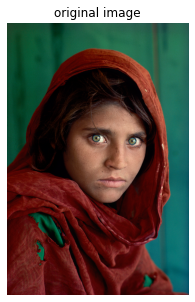

In [ ]:
img = imread('/content/drive/MyDrive/afgan_girl.jpg')
#img = np.mean(img, axis=-1)

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title('original image')
plt.axis('off')

In [ ]:
# Fourier transform

fft_img = np.fft.fft2(img, axes=(0, 1))
# which is similar to
# fft_img = np.fft.fft(img_channel, axis=...)
# fft_img = np.fft.fft(fft_img_channel, axis=...)

In [ ]:
sorted_channels = np.abs(fft_img).reshape(fft_img.shape[0] * fft_img.shape[1], 3)
sorted_channels = np.sort(sorted_channels, axis=0)

sorted_channels.shape

(2160000, 3)

total pixels in the image: 6480000
keep_ratio=0.1 | pixels left: 647997/6480000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


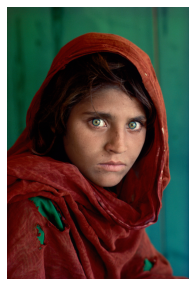

keep_ratio=0.05 | pixels left: 323997/6480000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


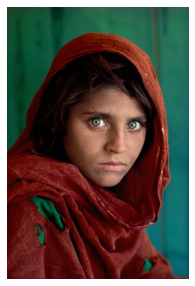

keep_ratio=0.01 | pixels left: 64797/6480000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


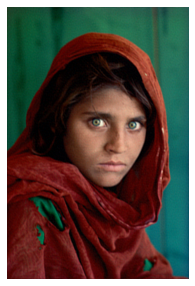

keep_ratio=0.005 | pixels left: 32397/6480000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


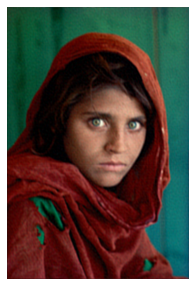

In [ ]:
# zeroing-out some parts of fft_img (compressing)

keep = [0.1, 0.05, 0.01, 0.005]
total_pixels = sorted_channels.shape[0] * sorted_channels.shape[1]
print('total pixels in the image:', total_pixels)

for ratio in keep:
  treshold = sorted_channels[int(np.floor((1 - ratio) * sorted_channels.shape[0])), :]
  indices = np.abs(fft_img) > treshold
  fft_compressed = fft_img * indices
  print(f'keep_ratio={ratio} | pixels left: {np.count_nonzero(fft_compressed)}/{total_pixels}')

  # ifft
  compressed = np.fft.ifft2(fft_compressed, axes=(0, 1)).real

  plt.figure(figsize=(5, 5))
  plt.imshow(compressed / 255.)
  plt.axis('off')
  plt.show()

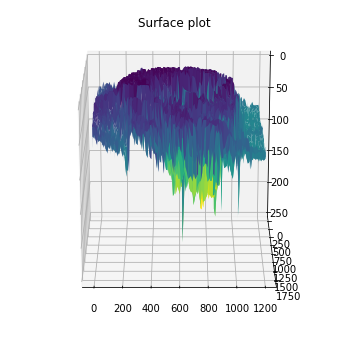

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 6]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.arange(1, img.shape[1] + 1), np.arange(1, img.shape[0] + 1))

ax.plot_surface(X[::10, ::10], Y[::10, ::10], np.mean(img, axis=-1)[::10, ::10], cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
ax.mouse_init()
ax.view_init(200, 270)
plt.show()

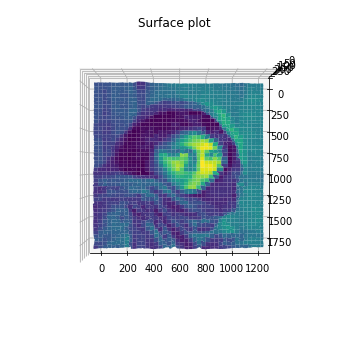

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 6]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.arange(1, img.shape[1] + 1), np.arange(1, img.shape[0] + 1))

ax.plot_surface(X[::10, ::10], Y[::10, ::10], np.mean(img, axis=-1)[::10, ::10], cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
ax.mouse_init()
ax.view_init(270, 270)
plt.show()